# 🌿 인공지능 설계 및 실습 프로젝트

<div style="text-align: right">IoT인공지능융합전공<div>
                                                                                                                       <div style="text-align: right">양승우<div>

### ==========================================================================================================
### Blood Transfusion Service Center Data Set을 활용한 분류문제 해결

#### 내용 : Blood Transfusion Service Center Data Set은 748명의 헌혈 기부자들의 정보가 들어 있습니다. 
예측변수를 포함하여 총 5개의 변수가 제공되며, 
학생들은 헌혈기부자가 다음에도 헌혈을 할 것인가에 대하여 예측을 하는 프로젝트입니다.(이진 분류)

참고 : https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center
  
### ==========================================================================================================

## Used Package Version

- Python 
  - python 3.7.5 ver.
- Scikit learn
  - sklearn 0.21.3 ver.
- Tensorflow
  - tensorflow 1.14.0 ver.

## Package Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # drawing graph more precisely
import matplotlib.pyplot as plt # drawing graph

## Data Import

- Transfusion.csv가 저장된 위치로 바꿔서 실행하시기 바랍니다.
#### (참고: 첨부된 파일에는 'Tranfuion.csv'으로 's'가 2개 빠졌으므로 'Transfusion.csv'으로 바꾼뒤 실행한다) 

In [2]:
transfusion = pd.read_csv('Transfusion.csv', header=0)

## Data Description

To demonstrate the RFMTC marketing model (a modified version of RFM), <br>
this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. <br>
The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months.<br> 
To build a FRMTC model, we selected 748 donors at random from the donor database. <br>

- Recency (months since last donation)
- Frequency (total number of donation)
- Monetary (total blood donated in c.c.)
- Time (months since first donation) 
- Donated (a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)).

In [3]:
transfusion.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency      748 non-null int64
Frequency    748 non-null int64
Monetary     748 non-null int64
Time         748 non-null int64
Donated      748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
transfusion.describe()

,Recency,Frequency,Monetary,Time,Donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


## Data Visualization

Number of Donating blood in March 2007:  178
Number of Not Donating blood in March 2007 :  570


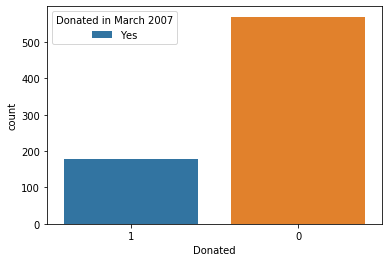

In [6]:
ax = sns.countplot(transfusion['Donated'], order=[1,0])
ax.legend(["Yes", "no"], title="Donated in March 2007")
ND, D = pd.value_counts(transfusion.Donated)
print('Number of Donating blood in March 2007: ',D)
print('Number of Not Donating blood in March 2007 : ',ND)

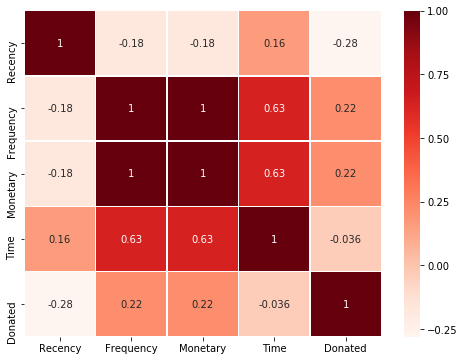

In [7]:
# Because matplotlib ver.3.1.1 have a bug, So I had to set limit manually.

plt.figure(figsize=(8,6)) 
ax = sns.heatmap(transfusion.corr(), linewidths=.5, annot=True, cmap="Reds")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

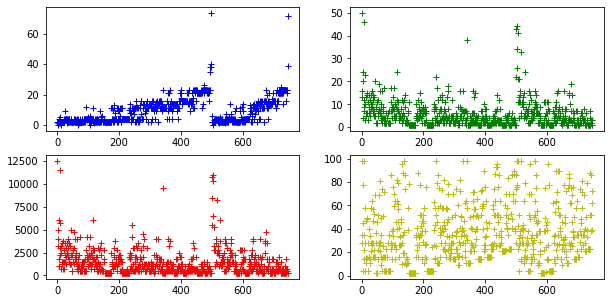

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(transfusion.Recency, 'b+')
plt.subplot(2,2,2)
plt.plot(transfusion.Frequency, 'g+')
plt.subplot(2,2,3)
plt.plot(transfusion.Monetary, 'r+')
plt.subplot(2,2,4)
plt.plot(transfusion.Time, 'y+')
plt.show()

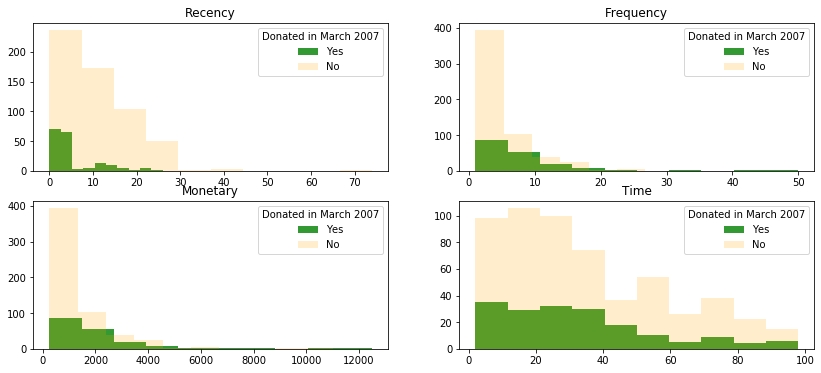

In [9]:
fig, axes = plt.subplots(2,2, figsize=(14,6))
ax = axes.ravel()

name=list(transfusion)
for i in range(0,4):
    ax[i].hist(transfusion[transfusion.Donated == 1][name[i]], 
             color="Green", label="Yes", alpha=0.8)
    ax[i].hist(transfusion[transfusion.Donated == 0][name[i]], 
             color="Orange", label="No", alpha=0.2)
    ax[i].set_title(name[i])
    ax[i].legend(["Yes", "No"], title="Donated in March 2007")

> <br>
> <br>
> <br>
> 
> # Trends of Data
> - If someone donate in 100 months since first donation (≈ 8 years)
> - If someone donate in 30 months since last donation (≈ 2 years)
> - If someone has low total number of donation <br>
>> **= There have a problihood of donation**
>
> <br>
> <br>
> <br>

# Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split # To split the dataset for training and testing.
from sklearn.model_selection import cross_val_score # Validation
from sklearn import metrics # For checking the model accuracy.

In [11]:
import scikitplot as skplt # drwaing ROC curve
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# random_state = 10 shows the highest performance.
train, test = train_test_split(transfusion, test_size = 0.2, random_state=seed) 

C:\ProgramData\Anaconda3\envs\MLproject\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\MLproject\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\MLproject\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\MLproject\lib\site-packages\ten

In [12]:
train_X = train[['Recency','Frequency','Monetary','Time']]# taking the training data features
train_y = train.Donated # output of our training data
test_X = test[['Recency','Frequency','Monetary','Time']] # taking test data features
test_y =test.Donated # output value of test data

### Data scaling (Min-Max Scaler) 

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.fit_transform(test_X)

In [14]:
print("Shape of train_X(scaled):", train_X_scaled.shape)
print("Shape of train_y:", train_y.shape)
print("Shape of test_X(scaled):", test_X_scaled.shape)
print("Shape of test_y:", test_y.shape)

Shape of train_X(scaled): (598, 4)
Shape of train_y: (598,)
Shape of test_X(scaled): (150, 4)
Shape of test_y: (150,)


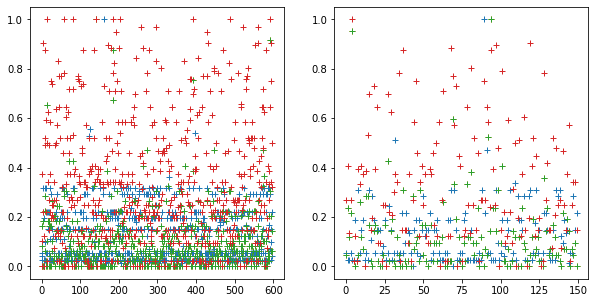

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_X_scaled, '+')
plt.subplot(1,2,2)
plt.plot(test_X_scaled, '+')
plt.show()

# Modeling

   - Keras
     - MLP(Multi-Layer Perceptron)<br><br>
   - Scikit-learn
       - Naive Bayes 
       - K-NN 
       - Logistic Regression 
       - SVM
       - MLP(Multi-Layer Perceptron)
       - Random Forest Tree (Ensemble) 
       - Gradient Boosting Tree (Ensemble) 

                                         Testing value = [ 2, 9, 2250, 22 ] 
                                               Predicted value = [ 1 ]
                                        You can change data value as you want

## Keras (MLP)

Using TensorFlow backend.



Epoch 1/200
598/598 [==============================] - 0s 660us/step - loss: 0.2280 - accuracy: 0.7709
Epoch 2/200
598/598 [==============================] - 0s 97us/step - loss: 0.1948 - accuracy: 0.7709
Epoch 3/200
598/598 [==============================] - 0s 52us/step - loss: 0.1765 - accuracy: 0.7709
Epoch 4/200
598/598 [==============================] - 0s 48us/step - loss: 0.1706 - accuracy: 0.7709
Epoch 5/200
598/598 [==============================] - 0s 50us/step - loss: 0.1676 - accuracy: 0.7709
Epoch 6/200
598/598 [==============================] - 0s 48us/step - loss: 0.1649 - accuracy: 0.7709
Epoch 7/200
598/598 [==============================] - 0s 58us/step - loss: 0.1628 - accuracy: 0.7709
Epoch 8/200
598/598 [==============================] - 0s 73us/step - loss: 0.1611 - accuracy: 0.7709
Epoch 9/200
598/598 [==============================] - 0s 67us/step - loss: 0.1601 - accuracy: 0.7709
Epoch 10/200
598/598 [==============================] - 0s 60us/step - loss: 0.1

598/598 [==============================] - 0s 50us/step - loss: 0.1452 - accuracy: 0.8043
Epoch 158/200
598/598 [==============================] - 0s 48us/step - loss: 0.1455 - accuracy: 0.8043
Epoch 159/200
598/598 [==============================] - 0s 50us/step - loss: 0.1456 - accuracy: 0.7960
Epoch 160/200
598/598 [==============================] - 0s 52us/step - loss: 0.1458 - accuracy: 0.7943
Epoch 161/200
598/598 [==============================] - 0s 50us/step - loss: 0.1454 - accuracy: 0.8010
Epoch 162/200
598/598 [==============================] - 0s 62us/step - loss: 0.1452 - accuracy: 0.8060
Epoch 163/200
598/598 [==============================] - 0s 117us/step - loss: 0.1452 - accuracy: 0.8010
Epoch 164/200
598/598 [==============================] - 0s 72us/step - loss: 0.1458 - accuracy: 0.8043
Epoch 165/200
598/598 [==============================] - 0s 103us/step - loss: 0.1452 - accuracy: 0.8060
Epoch 166/200
598/598 [==============================] - 0s 72us/step - loss

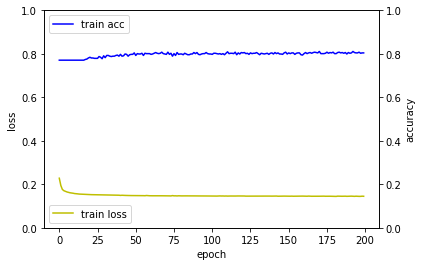

In [16]:
from keras.models import Sequential
from keras.layers import Dense

# model setting
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model compile
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['accuracy'])

# model fitting
hist = model.fit(train_X_scaled, train_y, epochs=200, batch_size = 32)

# drawing graph
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'lower left')
acc_ax.legend(loc = 'upper left')

# result print
print("\n Accuracy: %.4f" % (model.evaluate(test_X_scaled, test_y)[1]))

model.save('MLP_model.h5')

#### Predict your Inserted data

In [17]:
model = tf.keras.models.load_model('MLP_model.h5')
test_data = np.array([ 2, 9, 2250, 22 ]) # insert your data here.
predict = model.predict(test_data.reshape(1,4), batch_size=1)
print(predict)

[[1.]]


## scikit-learn 

### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
naive = GaussianNB()
naive.fit(train_X_scaled, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
pred_train = naive.predict(train_X_scaled)
pred_test = naive.predict(test_X_scaled)

print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.7591973244147158
The accuracy of test is: 0.7533333333333333


In [21]:
print(cross_val_score(naive, train_X_scaled, train_y, cv = 5)) # Validation

[0.78512397 0.75833333 0.77310924 0.7394958  0.7394958 ]


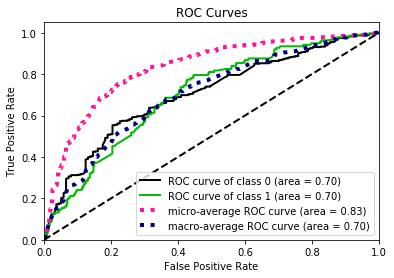

In [22]:
# ROC Curve
y_probas = naive.predict_proba(train_X_scaled)
skplt.metrics.plot_roc(train_y, y_probas)
plt.show()

#### Predict your inserted data ( Naive Bayes )

In [23]:
your_data = np.array([ 2, 9, 2250, 22 ])
print(naive.predict(your_data.reshape(1,4)))

[1]


### K-NN

In [24]:
from sklearn.neighbors import KNeighborsClassifier 

In [25]:
KNN = KNeighborsClassifier(n_neighbors=7) 
KNN.fit(train_X_scaled,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [26]:
prediction=KNN.predict(test_X_scaled)

print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.78


In [27]:
print(cross_val_score(KNN, train_X_scaled, train_y, cv = 5)) # Validation

[0.81818182 0.74166667 0.76470588 0.75630252 0.77310924]


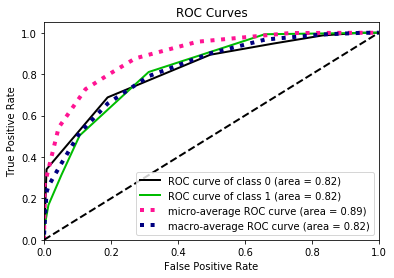

In [28]:
# ROC Curve
y_probas = KNN.predict_proba(train_X_scaled)
skplt.metrics.plot_roc(train_y, y_probas)
plt.show()

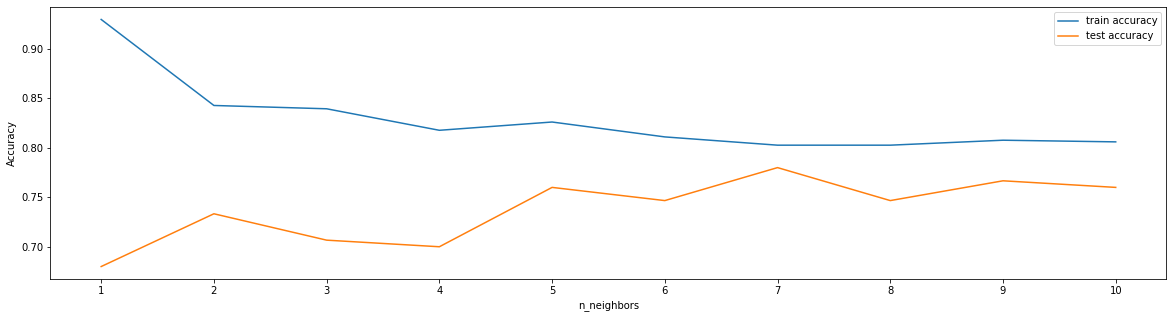

In [29]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(111)
a_index=list(range(1,11))
a=pd.Series()
b=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X_scaled,train_y)
    prediction_train=model.predict(train_X_scaled)
    prediction_test=model.predict(test_X_scaled)
    a=a.append(pd.Series(metrics.accuracy_score(prediction_train,train_y)))
    b=b.append(pd.Series(metrics.accuracy_score(prediction_test,test_y)))
ax1.plot(a_index, a, label="train accuracy")
ax1.plot(a_index, b, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.xticks(x)
plt.show()

#### Predict your inserted data ( K-NN )

In [30]:
your_data = np.array([ 2, 9, 2250, 22 ])
print(KNN.predict(your_data.reshape(1,4)))

[1]


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression 

In [32]:
logi = LogisticRegression(C = 100, solver='liblinear')
logi.fit(train_X_scaled,train_y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
pred_train = logi.predict(train_X_scaled)
pred_test = logi.predict(test_X_scaled) 

print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.782608695652174
The accuracy of test is: 0.76


In [34]:
print(cross_val_score(logi, train_X_scaled, train_y, cv = 5)) # Validation

[0.79338843 0.76666667 0.78991597 0.75630252 0.76470588]


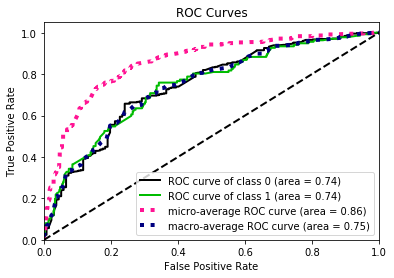

In [35]:
# ROC Curve
y_probas = logi.predict_proba(train_X_scaled)
skplt.metrics.plot_roc(train_y, y_probas)
plt.show()

#### Predict your inserted data ( Logistic Regression )

In [36]:
your_data = np.array([ 2, 9, 2250, 22 ])
print(logi.predict(your_data.reshape(1,4)))

[1]


### SVM

In [37]:
from sklearn.svm import LinearSVC

In [38]:
svm = LinearSVC() 
svm.fit(train_X_scaled,train_y) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [39]:
pred_train = svm.predict(train_X_scaled)
pred_test = svm.predict(test_X_scaled) 

print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.782608695652174
The accuracy of test is: 0.7466666666666667


In [40]:
print(cross_val_score(svm, train_X_scaled, train_y, cv = 5)) # Validation

[0.78512397 0.78333333 0.78151261 0.76470588 0.78151261]


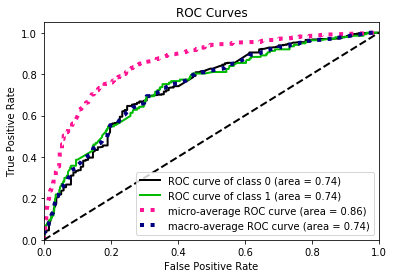

In [41]:
# ROC Curve
y_probas = svm._predict_proba_lr(train_X_scaled)
skplt.metrics.plot_roc(train_y, y_probas)
plt.show()

#### Predict your  inserted data ( Support Vector Classification )

In [42]:
your_data = np.array([ 2, 9, 2250, 22 ])
print(svm.predict(your_data.reshape(1,4)))

[1]


### MLP

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
mlp = MLPClassifier(solver='lbfgs', alpha = 0.1, early_stopping = True) 
mlp.fit(train_X_scaled,train_y) 

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
pred_train = mlp.predict(train_X_scaled)
pred_test = mlp.predict(test_X_scaled) 

print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.8043478260869565
The accuracy of test is: 0.78


In [46]:
print(cross_val_score(mlp, train_X_scaled, train_y, cv = 5)) # Validation

[0.83471074 0.78333333 0.79831933 0.76470588 0.79831933]


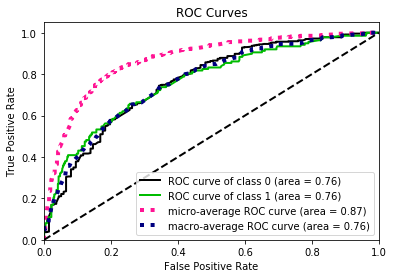

In [47]:
# ROC Curve
y_probas = mlp.predict_proba(train_X_scaled)
skplt.metrics.plot_roc(train_y, y_probas)
plt.show()

#### Predict your inserted data ( MLP )

In [48]:
your_data = np.array([ 2, 9, 2250, 22 ])
print(mlp.predict(your_data.reshape(1,4)))

[1]


### Random Forest Tree

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rftree = RandomForestClassifier(n_estimators=1000, max_depth=5)
rftree.fit(train_X_scaled,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
pred_train = rftree.predict(train_X_scaled)
pred_test = rftree.predict(test_X_scaled)

print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.8244147157190636
The accuracy of test is: 0.7933333333333333


In [52]:
print(cross_val_score(rftree, train_X_scaled, train_y, cv = 5)) # Validation

[0.82644628 0.725      0.78151261 0.77310924 0.79831933]


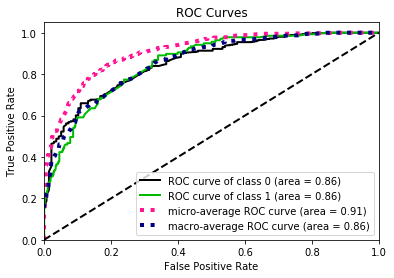

In [53]:
# ROC Curve
y_probas = rftree.predict_proba(train_X_scaled)
skplt.metrics.plot_roc(train_y, y_probas)
plt.show()

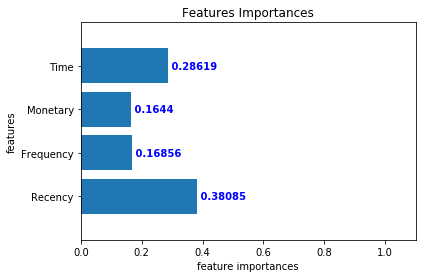

In [54]:
def plot_feature_imp(model, n_feature):
    n_features = n_feature # 특성의 개수
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), list(train_X))
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
    plt.xlim(0, 1.1)
    plt.title("Features Importances")
    
    y = list(model.feature_importances_)
    y = np.round(y, 5)
    
    for i, v in enumerate(y):
        plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

plot_feature_imp(rftree, n_feature=4)

#### Predict your  inserted data ( Random Forest )

In [55]:
your_data = np.array([ 2, 9, 2250, 22 ])
print(rftree.predict(your_data.reshape(1,4)))

[0]


### Gradient Boosting Tree

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbtree = GradientBoostingClassifier(n_estimators=10, max_depth = 5)
gbtree.fit(train_X_scaled,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [58]:
pred_train = gbtree.predict(train_X_scaled)
pred_test = gbtree.predict(test_X_scaled) 

print('The accuracy of train is:',metrics.accuracy_score(pred_train,train_y))
print('The accuracy of test is:',metrics.accuracy_score(pred_test,test_y))

The accuracy of train is: 0.8093645484949833
The accuracy of test is: 0.74


In [59]:
print(cross_val_score(gbtree, train_X_scaled, train_y, cv = 5)) # Validation

[0.78512397 0.73333333 0.75630252 0.75630252 0.78991597]


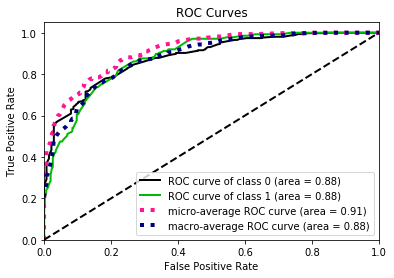

In [60]:
# ROC Curve
y_probas = gbtree.predict_proba(train_X_scaled)
skplt.metrics.plot_roc(train_y, y_probas)
plt.show()

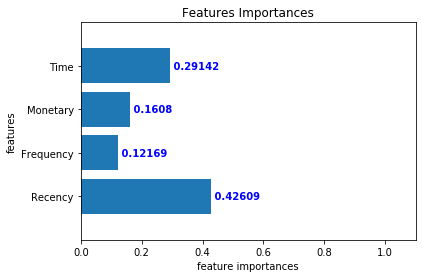

In [61]:
def plot_feature_imp(model, n_feature):
    n_features = n_feature # Number of feature
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), list(train_X))
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
    plt.xlim(0, 1.1)
    plt.title("Features Importances")
    
    y = list(model.feature_importances_)
    y = np.round(y, 5)
    
    for i, v in enumerate(y):
        plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

plot_feature_imp(gbtree, n_feature=4)

#### Predict your inserted data ( Gradient Boosting )

In [62]:
your_data = np.array([ 2, 9, 2250, 22 ])
print(rftree.predict(your_data.reshape(1,4)))

[0]


# Result

> 데이터 시각화(Data Visualization)이후 데이터 경향성을 보았을 때,
>
> 1. 첫번째 기부 이후 100개월 이내(≈ 8 년)
> 2. 지난 기부 이후 30개월 이내(≈ 2 년)
> 3. 총 기부 횟수가 적을수록
>
>> 기부할 확률이 있다
>
> 라는 이미 도출된 결과로부터 그 이후 앙상블 기법을 통해 특징 중요도를 보았더니, <br>
> 지난 기부 이후 '최근(最近; Recency)'의 변수가 가장 중요하다고 나타내어진다.
>><br><br>
>> **그러므로 '최근(最近; Recency)'이라는 변수 값이 낮을 수록 헌혈기부자가 다음에도 헌혈을 할 확률이 높을 것으로 보인다.**<br>
>><br><br>
>
> P.S.<br>
> 저번 과제의 물음이었기도한 상관계수가 높다하여 인과관계가 높지 않은 예(例;example)인것 같다.<br>
> 데이터의 특성상 트리(tree)가 특징값을 잘 뽑아낼 수는 있었으나, 예측이 잘 되지 않음을 볼 수 있었다.